In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.optimize import fsolve

sn.set_style('whitegrid')
%matplotlib inline

In [18]:
# Expanded and modivfied version (first column now string)
def read_table(filename,keyword='ciclo',rescale=1,ncols=5,start=2):
    t0 = start
    t1 = ncols+start
    results_follow = 0
    row_names = []
    table_raw = np.empty(t1-t0)
    f = open(filename,'r')
    for line in f:
        words = line.split()
        if len(words)>1 and words[0] == keyword:
            results_follow=1
            colnames = words[t0:t1]
        elif len(words)>1 and words[0] == "Total":
            break
        elif len(words)>1 and results_follow==1:
            row_names.append(words[0])
            buff_v = []
            for w in words[t0:t1]: 
                w = w.replace(",","")
                buff_v.append(w)
            table_raw = np.vstack((table_raw,np.array(buff_v,dtype=float)/rescale))
    table_raw = table_raw[1:,:]
    return pd.DataFrame(table_raw, columns=colnames,index=np.array(row_names))

In [19]:
dates = []
for year in range(1987,2023):
    for quarter in range(1,5):
        dates.append(str(year)+"Q"+str(quarter))
dates = dates[1:]

t0 = 59
T = len(dates)
date_dict = dict(zip(range(t0,T+t0),dates))
date_dict_reverse = dict(zip(dates,range(0,T)))
date_dict_reverse_ciclo = dict(zip(dates,range(t0,T+t0)))

# Parents Age 25-50

## Children Age <5

In [20]:
coefs_par = []
coefs_mar = []
coefs_parxmar = []
coefs_div = []
bounds_par = []
bounds_mar = []
bounds_parxmar = []
bounds_div = []
qs = ['2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020','2021','2022']
f = open('./regtabs/prob_perm_stocks_w_year_age2550_parent_5.log','r')
for line in f:
    words = line.split()
#     if 'if' in words:
#         indx_if = words.index("if")
#         ciclo = int(words[indx_if+1][7:10])
#         qs.append(date_dict[ciclo])
    if len(words)>0 and 'parent_5'==words[0]:
        coefs_par.append(float(words[2]))
        bounds_par.append((float(words[-2]),float(words[-1])))
    elif len(words)>0 and 'married'==words[0]:
        coefs_mar.append(float(words[2]))
        bounds_mar.append((float(words[-2]),float(words[-1])))
    elif len(words)>0 and 'married_parent_5'==words[0]:
        coefs_parxmar.append(float(words[2]))
        bounds_parxmar.append((float(words[-2]),float(words[-1])))
    elif len(words)>0 and 'divorced'==words[0]:
        coefs_div.append(float(words[2]))
        bounds_div.append((float(words[-2]),float(words[-1])))
bounds_par= np.array(bounds_par)
coefs_par = np.array(coefs_par)
bounds_mar= np.array(bounds_mar)
coefs_mar = np.array(coefs_mar)
bounds_parxmar = np.array(bounds_parxmar)
coefs_parxmar = np.array(coefs_parxmar)
bounds_div= np.array(bounds_div)
coefs_div = np.array(coefs_div)

coefs_m_par = []
coefs_m_mar = []
coefs_m_parxmar = []
coefs_m_div = []
bounds_m_par = []
bounds_m_mar = []
bounds_m_parxmar = []
bounds_m_div = []
f = open('./regtabs/prob_perm_stocks_m_year_age2550_parent_5.log','r')
for line in f:
    words = line.split()
    if len(words)>0 and 'parent_5'==words[0]:        
        coefs_m_par.append(float(words[2]))
        bounds_m_par.append((float(words[-2]),float(words[-1])))
    elif len(words)>0 and 'married'==words[0]:
        coefs_m_mar.append(float(words[2]))
        bounds_m_mar.append((float(words[-2]),float(words[-1])))
    elif len(words)>0 and 'married_parent_5'==words[0]:
        coefs_m_parxmar.append(float(words[2]))
        bounds_m_parxmar.append((float(words[-2]),float(words[-1])))
    elif len(words)>0 and 'divorced'==words[0]:
        coefs_m_div.append(float(words[2]))
        bounds_m_div.append((float(words[-2]),float(words[-1])))
bounds_m_par= np.array(bounds_m_par)
coefs_m_par = np.array(coefs_m_par)
bounds_m_mar= np.array(bounds_m_mar)
coefs_m_mar = np.array(coefs_m_mar)
bounds_m_parxmar = np.array(bounds_m_parxmar)
coefs_m_parxmar = np.array(coefs_m_parxmar)
bounds_m_div= np.array(bounds_m_div)
coefs_m_div = np.array(coefs_m_div)

In [21]:
coefs_i_par = []
coefs_i_mar = []
coefs_i_parxmar = []
coefs_i_div = []
bounds_i_par = []
bounds_i_mar = []
bounds_i_parxmar = []
bounds_i_div = []
qs = ['2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017','2018','2019','2020','2021','2022']
f = open('./regtabs/prob_inac_stocks_w_year_age2550_parent_5.log','r')
for line in f:
    words = line.split()
#     if 'if' in words:
#         indx_if = words.index("if")
#         ciclo = int(words[indx_if+1][7:10])
#         qs.append(date_dict[ciclo])
    if len(words)>0 and 'parent_5'==words[0]:
        coefs_i_par.append(float(words[2]))
        bounds_i_par.append((float(words[-2]),float(words[-1])))
    elif len(words)>0 and 'married'==words[0]:
        coefs_i_mar.append(float(words[2]))
        bounds_i_mar.append((float(words[-2]),float(words[-1])))
    elif len(words)>0 and 'married_parent_5'==words[0]:
        coefs_i_parxmar.append(float(words[2]))
        bounds_i_parxmar.append((float(words[-2]),float(words[-1])))
    elif len(words)>0 and 'divorced'==words[0]:
        coefs_i_div.append(float(words[2]))
        bounds_i_div.append((float(words[-2]),float(words[-1])))
bounds_i_par= np.array(bounds_i_par)
coefs_i_par = np.array(coefs_i_par)
bounds_i_mar= np.array(bounds_i_mar)
coefs_i_mar = np.array(coefs_i_mar)
bounds_i_parxmar = np.array(bounds_i_parxmar)
coefs_i_parxmar = np.array(coefs_i_parxmar)
bounds_i_div= np.array(bounds_i_div)
coefs_i_div = np.array(coefs_i_div)

coefs_i_m_par = []
coefs_i_m_mar = []
coefs_i_m_parxmar = []
coefs_i_m_div = []
bounds_i_m_par = []
bounds_i_m_mar = []
bounds_i_m_parxmar = []
bounds_i_m_div = []
f = open('./regtabs/prob_inac_stocks_m_year_age2550_parent_5.log','r')
for line in f:
    words = line.split()
    if len(words)>0 and 'parent_5'==words[0]:        
        coefs_i_m_par.append(float(words[2]))
        bounds_i_m_par.append((float(words[-2]),float(words[-1])))
    elif len(words)>0 and 'married'==words[0]:
        coefs_i_m_mar.append(float(words[2]))
        bounds_i_m_mar.append((float(words[-2]),float(words[-1])))
    elif len(words)>0 and 'married_parent_5'==words[0]:
        coefs_i_m_parxmar.append(float(words[2]))
        bounds_i_m_parxmar.append((float(words[-2]),float(words[-1])))
    elif len(words)>0 and 'divorced'==words[0]:
        coefs_i_m_div.append(float(words[2]))
        bounds_i_m_div.append((float(words[-2]),float(words[-1])))
bounds_i_m_par= np.array(bounds_i_m_par)
coefs_i_m_par = np.array(coefs_i_m_par)
bounds_i_m_mar= np.array(bounds_i_m_mar)
coefs_i_m_mar = np.array(coefs_i_m_mar)
bounds_i_m_parxmar = np.array(bounds_i_m_parxmar)
coefs_i_m_parxmar = np.array(coefs_i_m_parxmar)
bounds_i_m_div= np.array(bounds_i_m_div)
coefs_i_m_div = np.array(coefs_i_m_div)

ValueError: x and y must have same first dimension, but have shapes (18,) and (1,)

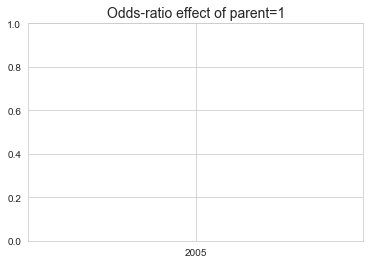

In [22]:
colors = sn.color_palette()
plt.figure(figsize=(6,4))
# plt.subplot(121)
plt.title("Odds-ratio effect of parent=1",fontsize=14)
plt.plot(qs,coefs_par,marker='o',label='women')
plt.scatter(qs,bounds_par[:,0],marker='_',color=colors[0])
plt.scatter(qs,bounds_par[:,1],marker='_',color=colors[0])
for i in range(coefs_par.size):
    plt.plot((qs[i],qs[i]),(bounds_par[i,0],bounds_par[i,1]),c=colors[0])
# plt.xticks(rotation=90)
# plt.axhline(1,color='r',lw=1)
# plt.ylim(0.6,1.4)

# plt.subplot(122)
# plt.title("Odds-ratio effect of parent=1, men",fontsize=16)
plt.plot(qs,coefs_m_par,color=colors[2],marker='o',label='men')
plt.scatter(qs,bounds_m_par[:,0],marker='_',color=colors[2])
plt.scatter(qs,bounds_m_par[:,1],marker='_',color=colors[2])
for i in range(coefs_m_par.size):
    plt.plot((qs[i],qs[i]),(bounds_m_par[i,0],bounds_m_par[i,1]),c=colors[2])
plt.yticks(fontsize=12)
plt.xticks(fontsize=13, rotation=45)
plt.axhline(1,color='r',lw=1)
plt.ylim(0.7,1.4)
plt.legend(loc='lower left',fontsize=14,ncol=2)
plt.tight_layout()
plt.savefig('./plots_reg/prob_p_womenVmen_parent_year_2550_5.pdf',format='pdf',bbox_inches='tight')
plt.show()

In [ ]:
colors = sn.color_palette()
plt.figure(figsize=(6,4))
# plt.subplot(121)
plt.title("Odds-ratio effect of parent=1",fontsize=14)
plt.plot(qs,coefs_i_par,marker='o',label='women')
plt.scatter(qs,bounds_i_par[:,0],marker='_',color=colors[0])
plt.scatter(qs,bounds_i_par[:,1],marker='_',color=colors[0])
for i in range(coefs_i_par.size):
    plt.plot((qs[i],qs[i]),(bounds_i_par[i,0],bounds_i_par[i,1]),c=colors[0])
# plt.xticks(rotation=90)
# plt.axhline(1,color='r',lw=1)
# plt.ylim(0.6,1.4)

# plt.subplot(122)
# plt.title("Odds-ratio effect of parent=1, men",fontsize=16)
plt.plot(qs,coefs_i_m_par,color=colors[2],marker='o',label='men')
plt.scatter(qs,bounds_i_m_par[:,0],marker='_',color=colors[2])
plt.scatter(qs,bounds_i_m_par[:,1],marker='_',color=colors[2])
for i in range(coefs_i_m_par.size):
    plt.plot((qs[i],qs[i]),(bounds_i_m_par[i,0],bounds_i_m_par[i,1]),c=colors[2])
plt.yticks(fontsize=12)
plt.xticks(fontsize=13, rotation=45)
plt.axhline(1,color='r',lw=1)
plt.ylim(0.7,1.5)
plt.legend(loc='lower right',fontsize=14,ncol=2)
plt.tight_layout()
plt.savefig('./plots_reg/prob_i_womenVmen_parent_year_2550_5.pdf',format='pdf',bbox_inches='tight')
plt.show()

ValueError: x and y must have same first dimension, but have shapes (18,) and (1,)

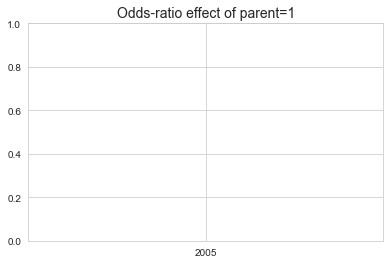

In [23]:
colors = sn.color_palette()
plt.figure(figsize=(14,4))

plt.subplot(121)
plt.title("Odds-ratio effect of parent=1",fontsize=14)
plt.plot(qs,coefs_par,marker='o',label='women')
plt.scatter(qs,bounds_par[:,0],marker='_',color=colors[0])
plt.scatter(qs,bounds_par[:,1],marker='_',color=colors[0])
for i in range(coefs_par.size):
    plt.plot((qs[i],qs[i]),(bounds_par[i,0],bounds_par[i,1]),c=colors[0])
plt.plot(qs,coefs_m_par,color=colors[2],marker='o',label='men')
plt.scatter(qs,bounds_m_par[:,0],marker='_',color=colors[2])
plt.scatter(qs,bounds_m_par[:,1],marker='_',color=colors[2])
for i in range(coefs_m_par.size):
    plt.plot((qs[i],qs[i]),(bounds_m_par[i,0],bounds_m_par[i,1]),c=colors[2])
plt.yticks(fontsize=12)
plt.xticks(fontsize=13, rotation=45)
plt.axhline(1,color='r',lw=1)
plt.ylim(0.7,1.4)
plt.legend(loc='lower left',fontsize=14,ncol=2)

plt.subplot(122)
plt.title("Odds-ratio effect of parent=1",fontsize=14)
plt.plot(qs,coefs_i_par,marker='o',label='women')
plt.scatter(qs,bounds_i_par[:,0],marker='_',color=colors[0])
plt.scatter(qs,bounds_i_par[:,1],marker='_',color=colors[0])
for i in range(coefs_i_par.size):
    plt.plot((qs[i],qs[i]),(bounds_i_par[i,0],bounds_i_par[i,1]),c=colors[0])
plt.plot(qs,coefs_i_m_par,color=colors[2],marker='o',label='men')
plt.scatter(qs,bounds_i_m_par[:,0],marker='_',color=colors[2])
plt.scatter(qs,bounds_i_m_par[:,1],marker='_',color=colors[2])
for i in range(coefs_i_m_par.size):
    plt.plot((qs[i],qs[i]),(bounds_i_m_par[i,0],bounds_i_m_par[i,1]),c=colors[2])
plt.yticks(fontsize=12)
plt.xticks(fontsize=13, rotation=45)
plt.axhline(1,color='r',lw=1)
plt.ylim(0.7,1.5)
plt.legend(loc='lower right',fontsize=14,ncol=2)


plt.tight_layout()
plt.savefig('./plots_reg/prob_womenVmen_parent_year_2550_5.pdf',format='pdf',bbox_inches='tight')
plt.show()